## Simple Linear Regression

1. Read and understand the data
2. Train the model
3. Residual analysis
4. Predict and evaluating on test data

In [50]:
#Import libraries
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Step 1: Read and Understand the data

In [2]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Figure size 720x1080 with 0 Axes>

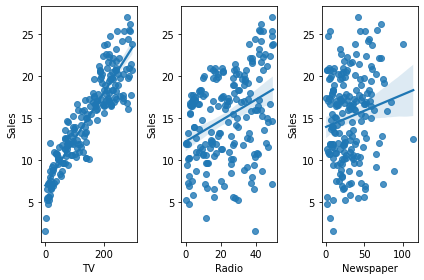

In [5]:
plt.figure(figsize=(10,15))
fig, ax = plt.subplots(1,3)
ax[0] = sns.regplot(x='TV', y='Sales', data=advertising, ax= ax[0])

ax[1] = sns.regplot(x='Radio', y='Sales', data=advertising, ax=ax[1])

ax[2] = sns.regplot(x='Newspaper', y='Sales', data=advertising, ax=ax[2])
plt.tight_layout()
plt.show()

In [6]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

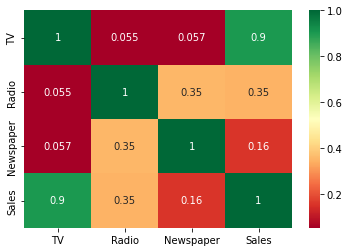

In [7]:
sns.heatmap(advertising.corr(), annot=True, cmap='RdYlGn')

### Step 2: Training the Model on training set

### Steps
- Create X and y
- train test split
- train the model on traing set (i.e. learn coefficients)
- Evaluate the model (training, test)

In [8]:
# Create X and y
X= advertising['TV']
y= advertising['Sales']

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.7, random_state=100)

In [10]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (140,)
y_train:  (140,)
X_test:  (60,)
y_test:  (60,)


In [11]:
# Train the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [12]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

$B_0$ = 6.94 , 
$B_1$ = 0.05
- Sales = 6.94 + 0.05*TV
##### It means
1. if you increase amount spent on TV with 1 unit, the amount of sales will increase by 0.01 unit
2. if no amount is spend on TV , sales will be 6.94

In [13]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.52e-52
Time:                        20:36:52   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# P- value is very low
# R-square is high --> 81.6%
# P(f-statistic) is vey low --> Not by chance  - The basic idea behind the F-test is that it is a relative comparison between the model that you've built and the model without any of the coefficients except for  β0. If the value of the F-statistic is high, it would mean that the Prob(F) would be low and hence, you can conclude that the model is significant. On the other hand, if the value of F-statistic is low, it might lead to the value of Prob(F) being higher than the significance level (taken 0.05, usually) which in turn would conclude that the overall model fit is insignificant and the intercept-only model can provide a better fit.

In [22]:
y_train_pred = lr_model.predict(X_train_sm)

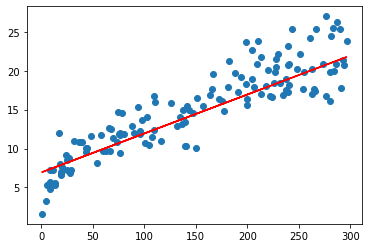

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.94 + 0.05*X_train, 'red')
plt.show()

###  Step 3 : Residual Analysis

In [ ]:
# error = funct(y_train, y_train_pred)

In [24]:
res = y_train - y_train_pred

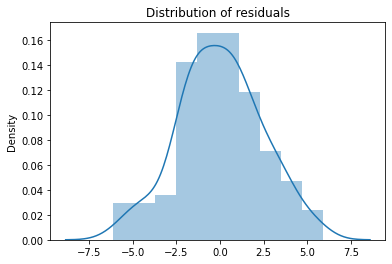

In [33]:
# Plot residuals
sns.distplot(res)
plt.title('Distribution of residuals')
plt.show()

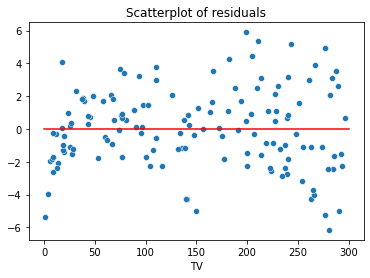

In [34]:
# look for patterns in residuals (we should not be able to identify patterns)
sns.scatterplot(X_train, res)
plt.plot([0, 100, 200, 300], [0,0,0,0], 'r')
plt.title('Scatterplot of residuals')
plt.show()

In [ ]:
# Residuals should be scattered around 0 which is seen in this case
# there are no visible patterns

### Step 4 : Prediction and Evaluation of Test set

In [ ]:
# make prediction on y_test (y_test_pred)
# evaluate the model, R-squared

In [37]:
# add constant
X_test_sm = sm.add_constant(X_test)

#pred on x_test
y_test_pred = lr_model.predict(X_test_sm)

###### R-squared

In [41]:
#evaluate the model
# R-sqaure
r2 = r2_score(y_true= y_test, y_pred= y_test_pred)
r2

0.792103160124566

In [42]:
# R-square on train
r2_score(y_true= y_train, y_pred= y_train_pred)

0.8157933136480389

In [ ]:
# difference between r-square on train and test is very low, generally under 5% differenceis good

###### Mean squared error

In [43]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)
# It is better to have a low mean square value

4.077556371826953

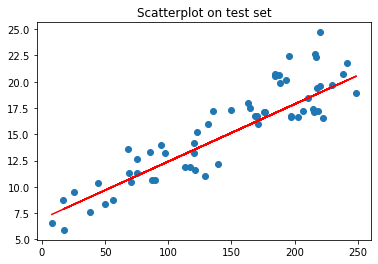

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title('Scatterplot on test set')
plt.show()

## Linear regression using Scikit Learn

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , random_state=100)

In [57]:
# reshape X_train to (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [58]:
# reshape X_test to (n,1)
X_test_lm =X_test.values.reshape(-1,1)

In [ ]:
# 1. Create Linear regression object
# 2. Fit the model
# 3. See the params, make predctions
# 4. Evaluate the model

In [60]:
# 1. Create linear regression object
lm = LinearRegression()

# 2. Fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [62]:
# 3. See the params, make predctions
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [63]:
# Make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [64]:
# 4. Evaluate the model
print(r2_score(y_true= y_train, y_pred= y_train_pred))
print(r2_score(y_true= y_test, y_pred= y_test_pred))

0.8157933136480389
0.7921031601245662
